In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import os
import lib_bbmdev
import logging
from datetime import datetime
import sys
from pathlib import Path

import scipy.signal


%matplotlib inline

In [2]:
#initialize
os.chdir(r'C:\Users\Arcalab_WS\DevelopingToolkit\bbm_run2_tdms')
path = "Data/2023_run2/"
excel_file = "tdms_dataframe_xlsx.xlsx"
df_excel = pd.read_excel(path+excel_file, header=1)
df_stable = df_excel.dropna()
df_stable.set_index("File", inplace = True)
df_stable

,0,Iu,Iv,Iw,A,B,Z,H,SV1,SV2,...,Count,Vu,Vv,Vw,Duration [s],Sampling Frequency [Hz],Low TH,High TH,Target freq [Hz],Is in Spreadsheet?
File,,,,,,,,,,,,,,,,,,,,,
tdms103_room-to-cryo.tdms,4,1,1,1,1,1,1,1,0,0,...,1,1,1,1,9348.000,1000,-0.5,0.5,1.0,Y
tdms104_room-to-cryo.tdms,5,1,1,1,1,1,1,1,0,0,...,1,1,1,1,15217.000,1000,-0.5,0.5,0.8,Y
tdms35_room-to-cryo.tdms,7,1,1,1,1,1,1,1,1,1,...,0,1,1,1,9959.000,1000,-8.0,-0.5,1.0,Y
tdms56_room-to-cryo.tdms,12,1,1,1,1,1,1,1,1,1,...,0,1,1,1,8452.000,1000,-8.0,-0.5,1.0,Y
tdms58_room-to-cryo.tdms,13,1,1,1,1,1,1,1,1,1,...,0,1,1,1,3648.000,1000,-8.0,-0.5,1.0,Y
tdms61_room-to-cryo.tdms,14,1,1,1,1,1,1,1,1,1,...,0,1,1,1,2105.000,1000,-8.0,-0.5,1.0,Y
tdms64_room-to-cryo.tdms,17,1,1,1,1,1,1,1,1,1,...,0,1,1,1,21744.009,1000,-8.0,-0.5,1.0,Y
tdms75_room-to-cryo.tdms,23,1,1,1,1,1,1,1,0,0,...,1,1,1,1,11302.000,1000,-0.5,0.5,1.0,Y
tdms88_room-to-cryo.tdms,29,1,1,1,1,1,1,1,0,0,...,1,1,1,1,11054.000,1000,-0.5,0.5,1.0,Y


In [3]:
os.chdir(r'C:\Users\Arcalab_WS\DevelopingToolkit\bbm_run2_tdms')
filename = "tdms103_room-to-cryo.tdms"




created_directory = lib_bbmdev.create_directory('C:/Users/Arcalab_WS/DevelopingToolkit/bbm_run2_tdms/Data/2023_run2/encoder_data/'+filename+'_encoder')

df_signal = lib_bbmdev.tdms_load_selected_custom(path + 'tdms/'+filename , samplerate=1000, print_=True)
os.chdir(created_directory)
df_signal

Directory 'C:/Users/Arcalab_WS/DevelopingToolkit/bbm_run2_tdms/Data/2023_run2/encoder_data/tdms103_room-to-cryo.tdms_encoder' already exists.


,time,Iu,Iv,Iw,A,B,Z,H,Count,Vu,Vv,Vw
0,0.000,-0.001192,0.005260,0.007852,1.104498,-10.375581,-0.898934,0.112319,-10.380818,0.002865,0.002850,0.008128
1,0.001,-0.000872,0.004944,0.007214,1.104817,-10.375581,-0.947625,0.112002,-10.380818,-0.012568,-0.012584,0.002983
2,0.002,-0.000872,0.004312,0.007533,1.104179,-10.375581,-0.977540,0.114533,-10.380818,0.002865,-0.002294,-0.002161
3,0.003,-0.001511,0.005576,0.007214,1.105135,-10.375581,-0.977222,0.113268,-10.380818,0.002865,-0.002294,0.002983
4,0.004,-0.000872,0.004312,0.007214,1.104817,-10.375581,-0.939669,0.112951,-10.380818,-0.002279,-0.002294,0.002983
...,...,...,...,...,...,...,...,...,...,...,...,...
9347995,9347.995,-0.001192,0.005260,0.004026,1.092379,0.532175,-0.539319,0.111054,0.000360,-0.002279,0.007995,0.002983
9347996,9347.996,-0.001192,0.004628,0.004026,1.092061,0.530911,-0.535819,0.111370,-0.001222,-0.002279,0.002850,-0.007306
9347997,9347.997,-0.000872,0.004944,0.004026,1.092061,0.528068,-0.538365,0.111054,-0.000905,-0.007424,0.002850,-0.007306
9347998,9347.998,-0.000872,0.004628,0.004664,1.092379,0.530595,-0.553004,0.111686,-0.000905,-0.007424,-0.002294,-0.007306


Stability zone goes from index 7281304 to index 8820001.
1.004363069 1.0981196690000001
0.188178319 1.0972895930000002
-1.6856306620000001 1.096449644
[[0.95414491555, 1.1530256524500002], [0.17876940305, 1.1521540726500001], [-1.7699121951, 1.1512721262]]


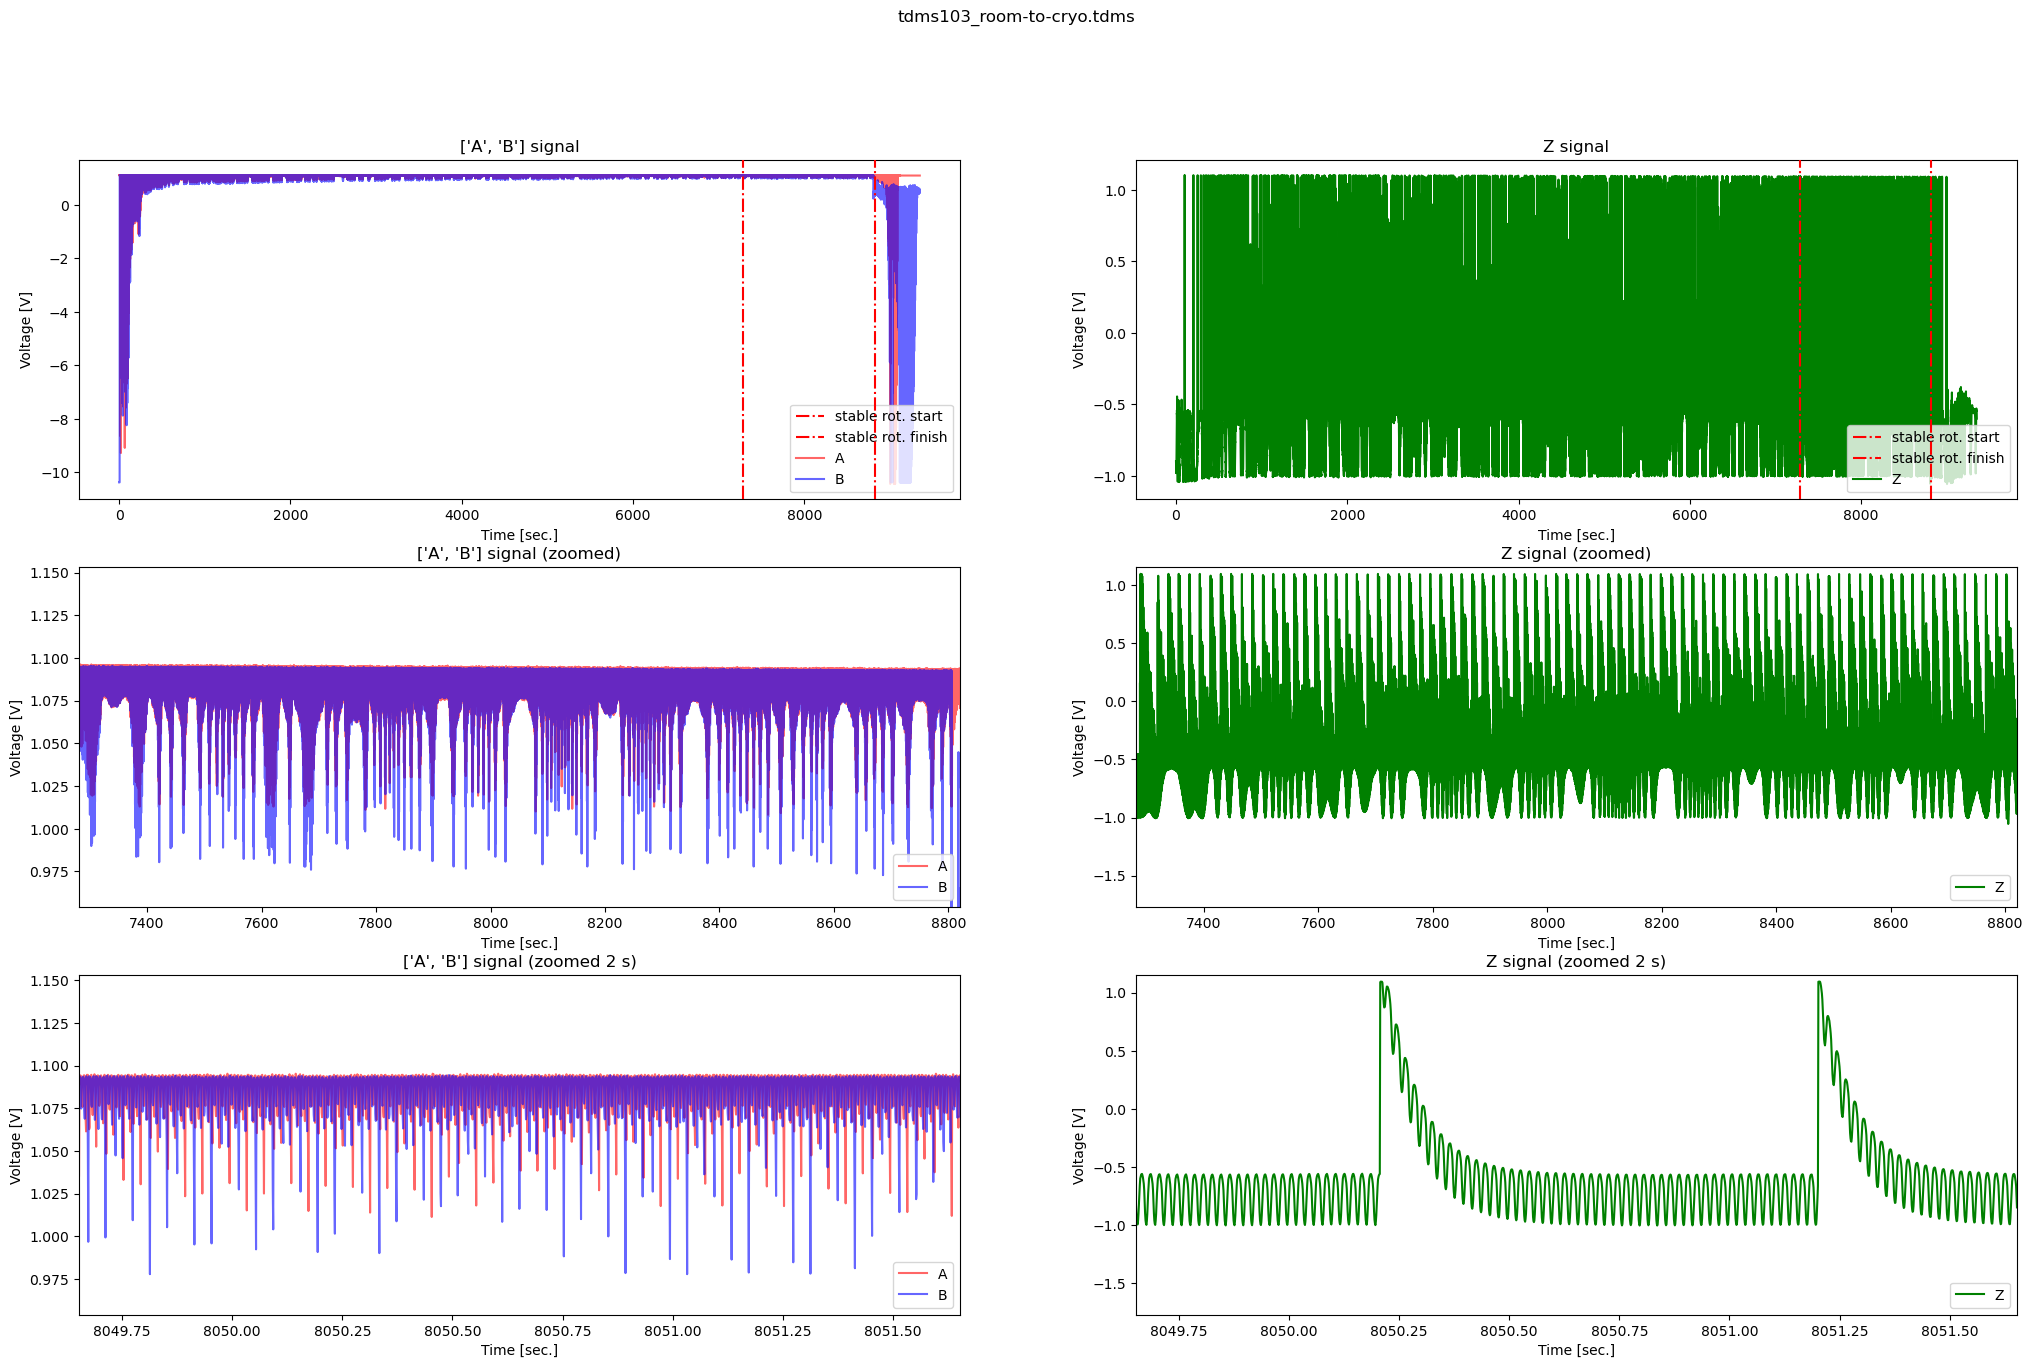

In [4]:
#%%time
#frequency
#encorder_threshold_high = 0.
#encorder_threshold_low = -4.
low_th, high_th, target_freq = df_stable.loc[filename, ['Low TH', 'High TH', 'Target freq [Hz]']]
threshold,time_stamps=lib_bbmdev.triggerd_window(df_signal['Z'].to_numpy(),df_signal['time'].to_numpy(),high_threshold=high_th,low_threshold=low_th,window_size=2)
period,freq=lib_bbmdev.time2freq(time_stamps)

try:
    if target_freq == 0.8:
        stable_index = np.where((freq>0.955*target_freq)&(freq<1.01*target_freq))[0]
    else:
        stable_index = np.where((freq>target_freq)&(freq<1.01*target_freq))[0]
    stable_str = time_stamps[1:][stable_index[0]]
    stable_fin = time_stamps[1:][stable_index[-1]]
except:
    stable_str = np.inf
    stable_fin = np.inf



limA, limB, limZ = lib_bbmdev.stability_zone_zoom([df_signal['A'],df_signal['B'],df_signal['Z']], df_signal['time'], stable_str, stable_fin, margin = 0.05, print_=True)
sta, fin = lib_bbmdev.stability_zone_start_end(df_signal['time'], stable_str, stable_fin, print_ = False)

sr = 100
sec_windowAB, sec_windowZ = 2, 2
y_data = df_signal['A'][::sr], df_signal['B'][::sr], df_signal['Z'][::sr]

y_data_zoom = df_signal['A'][::], df_signal['B'][::], df_signal['Z'][::]

x_data = df_signal['time'][::sr]
x_data_zoom = df_signal['time'][::]
fig, axs = plt.subplots(3,2, figsize=(25,15))
plot_data = list(y_data)
plot_data_zoom = list(y_data_zoom)
plot_labels = ["A", "B", "Z"]
plot_col = ["r", "b", "g"]

#first row
# Call the function with common time_data, multiple data arrays, and specified colors
axs[0,0].axvline(x = stable_str,c = 'r',ls='-.',label = 'stable rot. start', zorder=10) # vertical line at the start
axs[0,0].axvline(x = stable_fin,c = 'r',ls='-.',label = 'stable rot. finish', zorder=10) # vertical line at the finish
lib_bbmdev.plot_multiple_arrays_with_time_and_color(
    axs[0,0],
    x_data,
    plot_data[0:2],
    labels=plot_labels[0:2],
    plot_col=plot_col[0:2],
    alpha = 0.6
)
# Customize the plot
lib_bbmdev.layout_coil_current_voltage(axs[0,0], "Time [sec.]", "Voltage [V]")
axs[0,0].autoscale(enable=True, axis="x", tight=False)
axs[0,0].autoscale(enable=True, axis="y", tight=False)
axs[0,0].set_title(f'{plot_labels[0:2]} signal')
axs[0,0].legend(loc="lower right")

axs[0,1].axvline(x = stable_str,c = 'r',ls='-.',label = 'stable rot. start', zorder=10) # vertical line at the start
axs[0,1].axvline(x = stable_fin,c = 'r',ls='-.',label = 'stable rot. finish', zorder=10) # vertical line at the finish
lib_bbmdev.plot_multiple_arrays_with_time_and_color(
    axs[0,1],
    x_data,
    [plot_data[2]],
    labels=plot_labels[2],
    plot_col=plot_col[2],
)
lib_bbmdev.layout_coil_current_voltage(axs[0,1], "Time [sec.]", "Voltage [V]")
axs[0,1].autoscale(enable=True, axis="x", tight=False)
axs[0,1].autoscale(enable=True, axis="y", tight=False)
axs[0,1].set_title(f'{plot_labels[2]} signal')
axs[0,1].legend(loc="lower right")


#second row 

lib_bbmdev.plot_multiple_arrays_with_time_and_color(
    axs[1,0],
    x_data,
    plot_data[0:2],
    labels=plot_labels[0:2],
    plot_col=plot_col[0:2],
    alpha = 0.6
)
# Customize the plot
lib_bbmdev.layout_coil_current_voltage(axs[1,0], "Time [sec.]", "Voltage [V]")
axs[1,0].autoscale(enable=True, axis="x", tight=False)
axs[1,0].autoscale(enable=True, axis="y", tight=False)
axs[1,0].set_ylim(limA)
axs[1,0].set_title(f'{plot_labels[0:2]} signal (zoomed)')
axs[1,0].set_xlim(stable_str, stable_fin)
axs[1,0].legend(loc="lower right")

lib_bbmdev.plot_multiple_arrays_with_time_and_color(
    axs[1,1],
    x_data,
    [plot_data[2]],
    labels=plot_labels[2],
    plot_col=plot_col[2],
)
lib_bbmdev.layout_coil_current_voltage(axs[1,1], "Time [sec.]", "Voltage [V]")
axs[1,1].autoscale(enable=True, axis="x", tight=False)
axs[1,1].autoscale(enable=True, axis="y", tight=False)
axs[1,1].set_ylim(limZ)
axs[1,1].set_title(f'{plot_labels[2]} signal (zoomed)')
axs[1,1].set_xlim(stable_str, stable_fin)
axs[1,1].legend(loc="lower right")


#third row

lib_bbmdev.plot_multiple_arrays_with_time_and_color(
    axs[2,0],
    x_data_zoom,
    plot_data_zoom[0:2],
    labels=plot_labels[0:2],
    plot_col=plot_col[0:2],
    alpha= 0.6
)
# Customize the plot
lib_bbmdev.layout_coil_current_voltage(axs[2,0], "Time [sec.]", "Voltage [V]")
axs[2,0].autoscale(enable=True, axis="x", tight=False)
axs[2,0].autoscale(enable=True, axis="y", tight=False)
axs[2,0].set_ylim(limA)
axs[2,0].set_title(f'{plot_labels[0:2]} signal (zoomed {sec_windowAB} s)')
axs[2,0].set_xlim((stable_fin+stable_str)/2 - sec_windowAB/2, (stable_fin+stable_str)/2 + sec_windowAB/2)
axs[2,0].legend(loc="lower right")


lib_bbmdev.plot_multiple_arrays_with_time_and_color(
    axs[2,1],
    x_data_zoom,
    [plot_data_zoom[2]],
    labels=plot_labels[2],
    plot_col=plot_col[2],
)
lib_bbmdev.layout_coil_current_voltage(axs[2,1], "Time [sec.]", "Voltage [V]")
axs[2,1].autoscale(enable=True, axis="x", tight=False)
axs[2,1].autoscale(enable=True, axis="y", tight=False)
axs[2,1].set_ylim(limZ)
axs[2,1].set_title(f'{plot_labels[2]} signal (zoomed {sec_windowZ} s)')
axs[2,1].set_xlim((stable_fin+stable_str)/2 - sec_windowZ/2, (stable_fin+stable_str)/2 + sec_windowZ/2)
axs[2,1].legend(loc="lower right")

fig.suptitle(filename)
#plt.savefig(
           #"./" + "encoder.jpg",
           #dpi=130,
       #)
plt.show()

In [6]:
df_reduced = df_signal[sta:fin]
df_reduced

,time,Iu,Iv,Iw,A,B,Z,H,Count,Vu,Vv,Vw
7281304,7281.304,-0.035045,0.271701,-0.228391,1.095887,1.091288,0.101622,0.112319,-10.380818,-1.617620,1.458759,0.538019
7281305,7281.305,-0.094768,0.288136,-0.185669,1.095887,1.078021,1.094858,0.116114,-10.380818,-1.622765,1.252977,1.011320
7281306,7281.306,-0.151616,0.290981,-0.131789,1.093974,1.077073,1.095495,0.112319,-10.380818,-1.633054,0.887714,1.309705
7281307,7281.307,-0.201438,0.278970,-0.070577,1.087596,1.087813,1.095177,0.113268,-10.380818,-1.607332,0.383547,1.489766
7281308,7281.308,-0.241359,0.253053,-0.005538,1.073564,1.093815,1.094858,0.113268,-10.380818,-1.540454,-0.187498,1.566934
...,...,...,...,...,...,...,...,...,...,...,...,...
8819996,8819.996,0.268039,-0.044678,-0.213406,1.091423,0.327483,-0.949853,0.115798,-10.380818,0.023443,1.551361,-1.596980
8819997,8819.997,0.240892,0.021379,-0.251345,1.081218,0.317059,-0.991224,0.112319,-10.380818,-0.537297,1.592518,-1.494088
8819998,8819.998,0.201290,0.084592,-0.274938,1.065592,0.327799,-1.012865,0.112951,-10.380818,-1.010581,1.618240,-1.272872
8819999,8819.999,0.147636,0.147488,-0.284821,1.058895,0.332221,-1.013183,0.112951,-10.380818,-1.324390,1.623385,-0.902462


In [7]:
high_thB, low_thB, high_thA, low_thA = 1.085, 1.08, 1.085, 1.08
period_accumZ, periodZ, time_stampsZ, time_indexZ = lib_bbmdev.freq_calc_deriv(df_reduced['time'].to_numpy(), df_reduced['Z'].to_numpy(), 
                                                                        high_th, low_th, 100)



period_accumB, periodB, time_stampsB, time_indexB = lib_bbmdev.freq_calc_deriv(df_reduced['time'].to_numpy(), df_reduced['B'].to_numpy(), 
                                                         high_thB, low_thB,6)

period_accumA, periodA, time_stampsA, time_indexA = lib_bbmdev.freq_calc_deriv(df_reduced['time'].to_numpy(), df_reduced['A'].to_numpy(), 
                                                         high_thA, low_thA,6)

In [8]:
period_accumZ2, periodZ2, time_stampsZ2, time_indexZ2 = lib_bbmdev.freq_calc(df_reduced['time'].to_numpy(), df_reduced['Z'].to_numpy(), 
                                                                        high_th, low_th)



period_accumB2, periodB2, time_stampsB2, time_indexB2 = lib_bbmdev.freq_calc(df_reduced['time'].to_numpy(), df_reduced['B'].to_numpy(), 
                                                         high_thB, low_thB)

period_accumA2, periodA2, time_stampsA2, time_indexA2 = lib_bbmdev.freq_calc(df_reduced['time'].to_numpy(), df_reduced['A'].to_numpy(), 
                                                         high_thA, low_thA)

periodsA,freqsA=lib_bbmdev.time2freq(time_stampsA2)
periodsB,freqsB=lib_bbmdev.time2freq(time_stampsB2)
periodsZ,freqsZ=lib_bbmdev.time2freq(time_stampsZ2)

Calculating rotation frequency...: 100%|██████████| 1538696/1538696 [00:01<00:00, 1298183.86it/s]


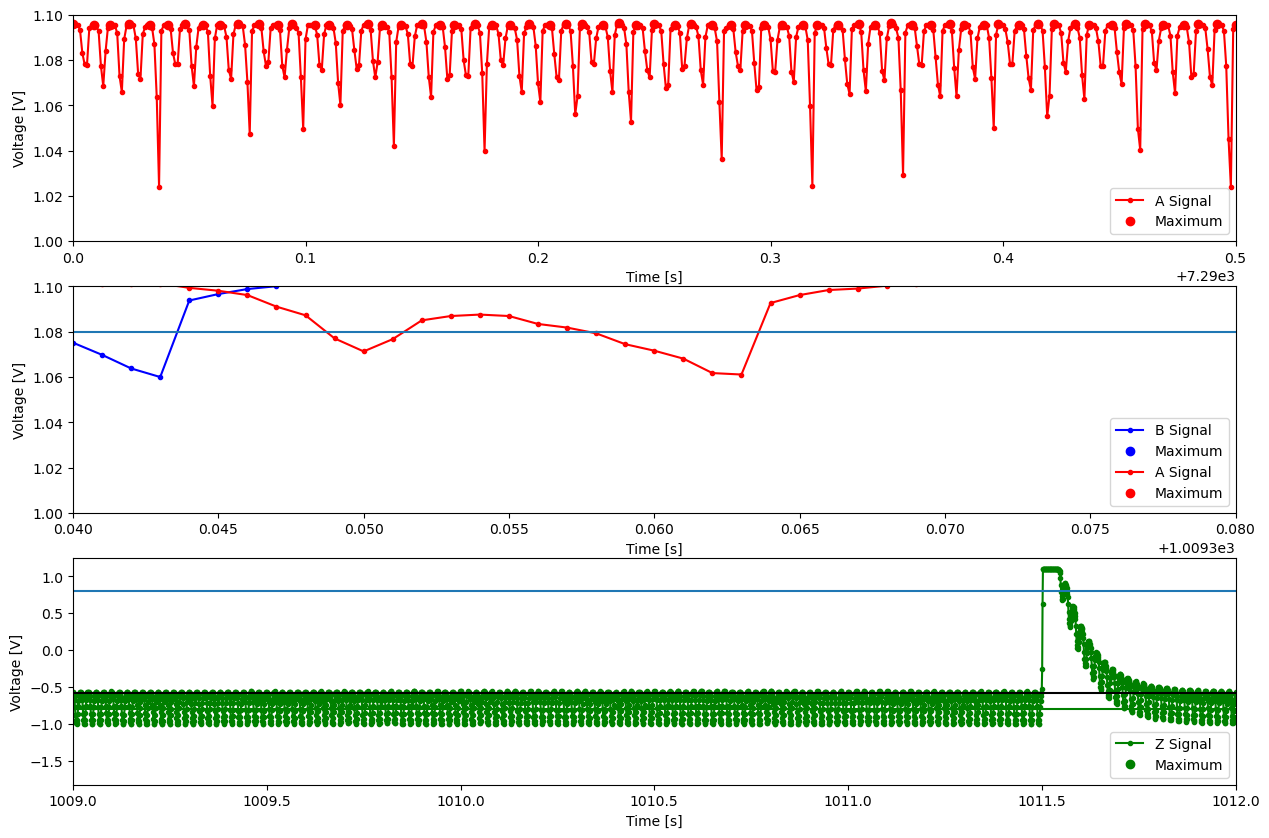

In [9]:
fig = plt.figure(figsize=[15,10])
plt.subplot(311)
plt.plot(df_signal['time'], df_signal['A'], 'r.-',alpha= 1, label ='A Signal')
plt.plot(df_signal['time'].to_numpy()[time_indexA+sta], df_signal['A'].to_numpy()[time_indexA+sta], 'ro', alpha= 1, label = 'Maximum')
plt.legend(loc='lower right')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.xlim([7290, 7290.5])
plt.ylim([1.00, 1.1])

plt.subplot(312)
plt.plot(df_signal['time'], df_signal['B'], 'b.-',alpha= 1, label ='B Signal')
plt.plot(df_signal['time'].to_numpy()[time_indexB+sta], df_signal['B'].to_numpy()[time_indexB+sta], 'bo', alpha= 1, label = 'Maximum')
plt.plot(df_signal['time'], df_signal['A'], 'r.-',alpha= 1, label ='A Signal')
plt.plot(df_signal['time'].to_numpy()[time_indexA+sta], df_signal['A'].to_numpy()[time_indexA+sta], 'ro', alpha= 1, label = 'Maximum')
plt.legend(loc='lower right')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.xlim([ 1009.34,  1009.38])
plt.axhline(1.08)
#plt.axhline(b_th)
#plt.axhline(np.mean(df_signal['A'][8000000:8001000]), color='k')
#plt.axhline((np.max(df_signal['A'][1009200:1010200])+np.min(df_signal['A'][1009200:1010200]))/2+np.max(df_signal['A'][1009200:1010200])/40, color='g')
plt.ylim([1.00, 1.1])

plt.subplot(313)

plt.plot(df_signal['time'], df_signal['Z'], 'g.-',alpha= 1, label ='Z Signal')
plt.plot(df_signal['time'].to_numpy()[time_indexZ+sta], df_signal['B'].to_numpy()[time_indexZ+sta], 'go', alpha= 1, label = 'Maximum')
plt.legend(loc='lower right')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.axhline(0.8)
#plt.axhline(z_th_mid, color = 'r')
plt.axhline(np.mean(df_signal['Z'][sta:fin]), color='k')
plt.axhline((np.max(df_signal['Z'][1009200:1010200])+np.min(df_signal['Z'][1009200:1010200]))/2+np.max(df_signal['Z'][1009200:1010200])/40, color='g')
plt.xlim([1009, 1012])


plt.show()

In [11]:
# filter parameters

dim = 3 # dimension of the state vector, 2 means position and velocity, 3 means position, velocity and acceleration

e_theta, e_theta_dot, e_theta_ddot = 2*np.pi/512, 0.006*(2*np.pi), 5e-6# 5e-6 #0.006*(2*np.pi), 1e-4 # Assumed error on initial guess

theta_dot_noises, theta_ddot_noises, theta_dddot_noises = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1], [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1], [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1] # process noise vectors (if you want to run the filter with different values to see which fits best)
theta_dot_noises, theta_ddot_noises, theta_dddot_noises=[1e-7], [1e-3], [1e-7]
#measurements vector
measurements = np.array([df_reduced['Z'].to_numpy(), df_reduced['A'].to_numpy(), df_reduced['B'].to_numpy()]).T
#measurements = np.array([noised_Z, noised_A, noised_B]).T
means = [] # vector to gather the mean value of the residuals
Qs = [] # vector of the process noise matrices

for tdn in theta_dot_noises:
    for tddn in theta_ddot_noises:
        for tdddn in theta_dddot_noises:
            
            theta_dot_noise, theta_ddot_noise, theta_dddot_noise = tdn, tddn, tdddn # process noise (first can be seen as a parameter, second is zero as we don't have acceleration)
            theta_dot_var, theta_ddot_var, theta_dddot_var = theta_dot_noise**2, theta_ddot_noise**2, theta_dddot_noise**2
            
            e_theta_var, e_theta_dot_var, e_theta_ddot_var = e_theta**2, e_theta_dot**2, e_theta_ddot**2

            sigma_noise = 2*np.pi/512/3 # measurement noise, it is the amplitude of the signal peak (maximum error, 3 sigma) divided by three
            R = np.diag([sigma_noise**2]) # measurement noise matrix (the greater the matrix, the less we trust the measurements / the more noise there is)

            if dim == 3:
                F = np.array([[0,1,0],[0,0,1], [0,0,0]]) # dynamics matrix
                Q = np.diag([theta_dot_var, theta_ddot_var, theta_dddot_var]) # process noise matrix
                P = np.diag([e_theta_var, e_theta_dot_var, e_theta_ddot_var]) # initial covariance matrix
                H = np.array([[1,0,0]]) # measurement matrix
            
            elif dim == 2:
                F = np.array([[0,1],[0,0]]) # dynamics matrix
                Q = np.diag([theta_dot_var, theta_ddot_var]) #  process noise matrix
                P = np.diag([e_theta_var, e_theta_dot_var]) #initial covariance matrix
                H = np.array([[1,0]]) # measurement matrix

            F=np.matrix(F)
            H=np.matrix(H)
            S = np.eye(dim)
            print(f'Starting run with Q = {Q}')
            # vectors
            theta_vect = [] # vector of KF angular position 
            theta_dot_vect = [] # vector of KF angular velocity 
            theta_ddot_vect = [] # vector of KF angular acceleration (only if dim = 3)
            thetas_z, thetas_a, thetas_b = [], [], [] # vectors of positions derived using the frequencies retrieved from the A/B/Z peaks' amplitudes
            tempi = [] # vector of time istances 
            tempi_a, tempi_b, tempi_z = [], [], [] # vectors of time istances relative to the measurements processed separated according to the encoder signal
            misure_a, misure_b, misure_z = [], [], [] # vectors of the measurements processed separated according to the encoder signal
            measurements_angle, measurements_time = [], [] # vectors of the measurements processed and the relative time istances (includes all encoders)
            residuals_vect, residuals_vect_abz = [], [] # vectors of the difference between the measured angle and the propagated angle (KF-propagated first vector, A/B/Z-propagated second vector)
            freqs_a, freqs_z, freqs_b = [], [], [] # vectors of the frequencies derived from the A/B/Z peaks' amplitudes
            frequenze_a, frequenze_b, frequenze_z = [], [], []
            # initialize parameters

            t = df_reduced['time'].to_numpy() # vector to be used as time
            start = 0 #7281304  # first index
            duration = len(t) - start - 1 # last index
            time = t[start]
            tf = t[start + duration - 1]
            ts = 0.001 # sampling time
            i=start
            t_int = 1 # index variation between two consecutive steps, keep 1
            t_next = t[start+t_int]-t[start] # time between two consecutive steps. Equals to ts if t_int = 1 (with some numerical approximation error at most)
            a_th, b_th, z_th = 1.07, 1.07, -0.5 # thresholds for maxima computation
            #a_th, b_th, z_th = 0.023652490999999998, 1.051241369, 1.0334812270000002
            a_th_mid, b_th_mid, z_th_mid = 1.09, 1.09, -0.5 # thresholds for frequency computation
            #a_th_mid, b_th_mid, z_th_mid = 0, 0, 0
            #a_th_mid, b_th_mid, z_th_mid = 0.023652490999999998, 1.051241369, 1.0334812270000002
            a_max, a_min, b_max, b_min, z_max, z_min = a_th, a_th, b_th, b_th, z_th, z_th
            #counters to process data and retrieve frequencies / maximums
            z_switch = 1
            a_count, b_count = 6, 6
            z_count, z_count_mid = 900, 900
            t_count = 1
            t_boost = 0 # this value takes into account when two maximums are super-imposed
            # initial values
            theta_h = 0 + e_theta
            #theta_dot_h = 2*np.pi + e_theta_dot
            theta_dot_h =0*2*np.pi + e_theta_dot
            theta_ddot_h = 9e-04+ e_theta_ddot
            #theta_ddot_h = 0 + e_theta_dot       
            freq_z, freq_a, freq_b = 1, 128, 128
            theta_z, theta_a, theta_b = 0,0,0 
            time_a, time_b, time_z = 0, 0, 0
            measuring, b_switch = 'z', 1
            noise_flag = 0 # if 0 no additional noise is added to the measurements, keep 0
            reset = False # if True the A/B/Z-derived angles are reset to the measurement angle at every measurement
            start_flag = 0 # Enables the processing of A/B signals. It turns to 1 after the first Z signal is processed
            res_to_plot_z, res_to_plot_ekf = [], []
            times_to_plot = []
            while time < tf:
                z1, a1, b1 = measurements[i]
                z2, a2, b2 = measurements[i+1]
                if (a1 > a_max) & (a1 < 10):
                    a_max = a1
                if (b1 > b_max) & (b1 < 10):
                    b_max = b1
                if (z1 > z_max)& (z1 < 1):
                    z_max = z1
                if (a1 < a_min) & (a1 > -10):
                    a_min = a1
                if (b1 < b_min) & (b1 > -10):
                    b_max = b1
                if (z1 < z_min) & (z1 > -12):
                    z_min = z1

                if (i%5000 == 0) & (i!=0):
                    a_th = (a_min + a_max)/2# + a_max/40
                    b_th = (b_min + b_max)/2# + b_max/40
                    z_th = (z_min + z_max)/2 #+ #z_max/40
                # compute time stamps and frequencies based on peaks' amplitudes

                if (z1 < z_th_mid) & (z2 > z_th_mid) & (z_count_mid >= 900) & (z_switch == 1):
                    aa = float((z2-z1)/t_next)
                    bb = z1 - aa*time
                    time_stampz = float(z_th_mid - bb)/aa
                    if time_z != 0:
                        freq_z = 1/(time_stampz - time_z)

                    z_switch = 0
                    z_count_mid = 0

                    time_z = time_stampz
                if (a1 < a_th_mid) & (a2 > a_th_mid):
                    aa = float((a2-a1)/t_next)
                    bb = a1 - aa*time
                    time_stampa = float(a_th_mid - bb)/aa
                    if time_a != 0:
                        freq_a = 1/(time_stampa - time_a)
                    time_a = time_stampa

                if (b1 < b_th_mid) & (b2 > b_th_mid):
                    aa = float((b2-b1)/t_next)
                    bb = b1 - aa*time
                    time_stampb = float(b_th_mid - bb)/aa
                    if time_b != 0:
                        freq_b = 1/(time_stampb - time_b)
                    b_switch = 1
                    time_b = time_stampb
                    
                # Activate KF if the measurement is a maximum, otherwise just propagate the angle
                    
                if (z1 > z2) & (z1 > z_th) & (z_count >=900):
                    if start_flag == 0:
                        theta_h = 0 + e_theta
                    
                    start_flag = 1 # Allow to process A/B signal
                    measuring = 'z'
                    if theta_h >6:
                        meas = 2*np.pi + noise_flag*np.random.normal(0, sigma_noise)
                        res_z = 2*np.pi - theta_z
                    else:
                        meas = 0 + noise_flag*np.random.normal(0, sigma_noise)
                        res_z = 0 - theta_z

                    print('processing z', time, t_count, meas, theta_h, theta_dot_h, a_th, b_th, z_th)
                    #print(t_count)
                    #print(f'ekf residual is {2*np.pi-theta_h}, z residual is {res_z}')
                    if start_flag == 1:    
                        measurements_angle.append(meas)
                        measurements_time.append(time)
                        tempi_z.append(time)
                        freqs_z.append(freq_z)
                        misure_z.append(meas)
                        residuals_vect_abz.append(res_z)
                        res_to_plot_z.append(res_z)
                        times_to_plot.append(time)
                        
                    
                        # Activate kalman filter
                        if dim == 3:
                            S =F*ts + np.eye(dim) + F*F*ts**2/2
                            Qk = Q*ts + F.T*Q*ts**2/2 + (F*F).T*Q*ts**3/6 + F*Q*ts**2/2+ F*Q*F.T*ts**3/3 + F*Q*(F*F).T*ts**4/8 + F*F*Q*ts**3/6 + F*F*Q*F.T*ts**4/8 + F*F*Q*(F*F).T*ts**5/20
                        elif dim ==2 :
                            S = F*ts + np.eye(dim)
                            Qk = Q*ts + (F*Q*ts**2 + Q*F.T*ts**2)/2 + F*Q*F.T*ts**3/3

                        M = S*P*S.T + Qk

                        K = M * H.T * ((H*M*H.T+R)**-1)
                        P = (np.eye(dim)- K*H)*M
                        P = (np.eye(dim)- K*H)*M*((np.eye(dim)- K*H).T) + K*R*K.T
                        P = (P + P.T)/2

                        # Process the measurements with KF
                        measure = meas #+ np.random.normal(0, 2*np.pi/512/6)
                        if dim == 3:
                            state = np.matrix([theta_h, theta_dot_h, theta_ddot_h]).T
                        elif dim == 2:
                            state = np.matrix([theta_h, theta_dot_h]).T
                        model = H*S*state
                        residuals = measure - model
                        residuals_vect.append(residuals)
                        res_to_plot_ekf.append(residuals)
                        #print(f'ekf residual is {residuals}, z residual is {res_z}')

                        # KF correction
                        if dim == 3:
                            theta_h, theta_dot_h, theta_ddot_h = (theta_h + K[0,:]*residuals)[0,0], (theta_dot_h + K[1,:]*residuals)[0,0], (theta_ddot_h + K[2,:]*residuals)[0,0]
                        elif dim ==2:
                            theta_h, theta_dot_h = (theta_h + K[0,:]*residuals)[0,0], (theta_dot_h + K[1,:]*residuals)[0,0]
                        if theta_h >= 2*np.pi:
                            theta_h = theta_h - 2*np.pi
                        t_count=1


                    if reset:
                        theta_z = 0
                        theta_a, theta_b = 0, 0

                    z_count = 0
                    z_switch = 1
                    b_switch = 1

                if (a1 > a2) & (a1 > a_th) & (a_count >=6) & (start_flag ==1) & (t_count<512) & (t_count>1):
                    #print('a maximum')
                    #if (t_count<512) & (t_count>1):
                    #print(measuring)
                    if (b1 > b2) & (b1 > b_th)& (b_count >=6):  # mi dice se devo processare questo A o no
                        #print('also b maximum')
                        if measuring == 'a': # last measure is A
                            t_boost = 0 # I consider that I skipped one A maximum and go on to process B 
                            b_switch = 1
                        else: # last measure is B or Z
                            #& (t_count<512) & (t_count>1) &
                            t_boost = 0 # I process A but taking into account that I skipped one B maximum
                            measuring = 'b'
                            b_switch = 0 # disable processing on B in the same loop
                        #print(f'double maximum, skipping {measuring}')
                    if measuring != 'a':
                        
            
                        measuring = 'a'

                        meas = 2*np.pi*t_count/512 + noise_flag*np.random.normal(0, sigma_noise)
                        #print('processing a', time, t_count, meas, theta_h, theta_dot_h)
                        res_a = meas - theta_a
                        residuals_vect_abz.append(res_a)
                        if reset:
                            theta_a = 2*np.pi*t_count/512

                        # Activate kalman filter
                        if dim == 3:
                            S =F*ts + np.eye(dim) + F*F*ts**2/2
                            Qk = Q*ts + F.T*Q*ts**2/2 + (F*F).T*Q*ts**3/6 + F*Q*ts**2/2+ F*Q*F.T*ts**3/3 + F*Q*(F*F).T*ts**4/8 + F*F*Q*ts**3/6 + F*F*Q*F.T*ts**4/8 + F*F*Q*(F*F).T*ts**5/20
                        elif dim ==2 :
                            S = F*ts + np.eye(dim)
                            Qk = Q*ts + (F*Q*ts**2 + Q*F.T*ts**2)/2 + F*Q*F.T*ts**3/3

                        M = S*P*S.T + Qk

                        K = M * H.T * ((H*M*H.T+R)**-1)
                        P = (np.eye(dim)- K*H)*M
                        P = (np.eye(dim)- K*H)*M*((np.eye(dim)- K*H).T) + K*R*K.T
                        P = (P + P.T)/2

                        # Process the measurements with KF
                        measure = meas 
                        measurements_angle.append(meas)
                        measurements_time.append(time)
                        misure_a.append(meas)
                        tempi_a.append(time)
                        freqs_a.append(freq_a)
                        if dim == 3:
                            state = np.matrix([theta_h, theta_dot_h, theta_ddot_h]).T
                        elif dim == 2:
                            state = np.matrix([theta_h, theta_dot_h]).T
                        model = H*S*state
                        residuals = measure - model
                        residuals_vect.append(abs(residuals))
                
                        #print(f'ekf residual is {residuals}, a residual is {res_a}')

                        # KF correction
                        if dim == 3:
                            theta_h, theta_dot_h, theta_ddot_h = (theta_h + K[0,:]*residuals)[0,0], (theta_dot_h + K[1,:]*residuals)[0,0], (theta_ddot_h + K[2,:]*residuals)[0,0]
                        elif dim ==2:
                            theta_h, theta_dot_h = (theta_h + K[0,:]*residuals)[0,0], (theta_dot_h + K[1,:]*residuals)[0,0]
                    
                        a_count = 0
                        t_count+= 1 + t_boost
                        a_switch = 1
                        t_boost = 0
                if (b1 > b2) & (b1 > b_th)& (b_count >=6) & (start_flag ==1) &  (b_switch == 1):
                    #print('b maximum')
                    #if measuring == 'b':
                        #print('processing two consecutive b', time, t_count)
                    if measuring != 'b':
                        measuring = 'b'
                        meas = 2*np.pi*t_count/512 + noise_flag*np.random.normal(0, sigma_noise)
                        if t_count >= 512:
                            if theta_h < 1:
                                meas = abs(meas - 2*np.pi)
                        #print('processing b', time, t_count, meas, theta_h, theta_dot_h)
                        res_b = meas - theta_b
                        residuals_vect_abz.append(res_b)
                        if reset:
                            theta_b = 2*np.pi*t_count/512
        
                        # Activate kalman filter
                        if dim == 3:
                            S =F*ts + np.eye(dim) + F*F*ts**2/2
                            Qk = Q*ts + F.T*Q*ts**2/2 + (F*F).T*Q*ts**3/6 + F*Q*ts**2/2+ F*Q*F.T*ts**3/3 + F*Q*(F*F).T*ts**4/8 + F*F*Q*ts**3/6 + F*F*Q*F.T*ts**4/8 + F*F*Q*(F*F).T*ts**5/20
                        elif dim ==2 :
                            S = F*ts + np.eye(dim)
                            Qk = Q*ts + (F*Q*ts**2 + Q*F.T*ts**2)/2 + F*Q*F.T*ts**3/3

                        M = S*P*S.T + Qk

                        K = M * H.T * ((H*M*H.T+R)**-1)
                        P = (np.eye(dim)- K*H)*M
                        P = (np.eye(dim)- K*H)*M*((np.eye(dim)- K*H).T) + K*R*K.T
                        P = (P + P.T)/2

                        # Process the measurements with KF
                        measure = meas 
                        if dim == 3:
                            state = np.matrix([theta_h, theta_dot_h, theta_ddot_h]).T
                        elif dim == 2:
                            state = np.matrix([theta_h, theta_dot_h]).T
                        model = H*S*state
                        residuals = measure - model
                        measurements_angle.append(measure)
                        measurements_time.append(time)
                        tempi_b.append(time)
                        misure_b.append(meas)
                        residuals_vect.append(residuals)
                        freqs_b.append(freq_b)
                        #print(f'ekf residual is {residuals}, b residual is {res_b}')

                        # KF correction
                        if dim == 3:
                            theta_h, theta_dot_h, theta_ddot_h = (theta_h + K[0,:]*residuals)[0,0], (theta_dot_h + K[1,:]*residuals)[0,0], (theta_ddot_h + K[2,:]*residuals)[0,0]
                        elif dim ==2:
                            theta_h, theta_dot_h = (theta_h + K[0,:]*residuals)[0,0], (theta_dot_h + K[1,:]*residuals)[0,0]
                        t_count+=3 + t_boost
                        b_count = 0
                        t_boost = 0
                z_count+=1
                z_count_mid+=1
                a_count += 1
                b_count+=1
                if start_flag == 1:
                    theta_vect.append(theta_h)
                    theta_dot_vect.append(theta_dot_h)
                    thetas_z.append(theta_z)
                    thetas_a.append(theta_a)
                    thetas_b.append(theta_b)
                    tempi.append(time)

                # Propagation/prediction using KF
                if dim ==3:
                    theta_ddot_vect.append(theta_ddot_h)
                    state = np.matrix([theta_h, theta_dot_h, theta_ddot_h]).T
                    new_state = S*state
                    theta_h, theta_dot_h, theta_ddot_h = new_state[0,0], new_state[1,0], new_state[2,0]
                elif dim == 2:
                    state = np.matrix([theta_h, theta_dot_h]).T
                    new_state = S*state
                    theta_h, theta_dot_h = new_state[0,0], new_state[1,0]
                
                # Propagation/prediction using A/B/Z frequencies
                theta_z+= 2*np.pi*freq_z*ts
                theta_a+= 2*np.pi*freq_a*ts/128
                theta_b+= 2*np.pi*freq_b*ts/128

                # Reset the angles if greater than 2*pi
                if theta_h > 2*np.pi:
                    theta_h = theta_h - 2*np.pi
                if theta_z > 2*np.pi:
                    theta_z = theta_z - 2*np.pi
                if theta_a > 2*np.pi:
                    theta_a = theta_a - 2*np.pi
                if theta_b > 2*np.pi:
                    theta_b = theta_b - 2*np.pi
                    
                #print((theta_h-theta_z),(theta_h-theta_z)*180/np.pi, theta_h, theta_dot_h, t_count)
                frequenze_a.append(freq_a)
                frequenze_b.append(freq_b)
                frequenze_z.append(freq_z)
                # Go forward in time
                i+=t_int
                time = time+t_next

            means.append(np.mean(abs(np.array(residuals_vect))))
            Qs.append(Q)
            print(f'Run with Q = {Q} completed, mean residual = {np.mean(abs(np.array(residuals_vect)))}')
            freqs_z, freqs_a, freqs_b = np.array(freqs_z), np.array(freqs_a), np.array(freqs_b)
            
            
        



Starting run with Q = [[1.e-14 0.e+00 0.e+00]
 [0.e+00 1.e-06 0.e+00]
 [0.e+00 0.e+00 1.e-14]]
processing z 7281.3060000000005 1 0.0 0.01227184630308513 0.03769911184307752 1.07 1.07 -0.5
processing z 7282.306000000204 512 6.283185307179586 6.269684253380047 6.320371889932318 1.07 1.07 -0.5
processing z 7283.306000000408 512 6.283185307179586 6.28251049412108 6.28203563952957 1.07 1.07 -0.5
processing z 7284.306000000612 512 6.283185307179586 6.279783215274287 6.283988532073778 1.07 1.07 -0.5
processing z 7285.306000000815 512 0.0 0.0008623462145269656 6.288659904929448 1.07 1.07 -0.5
processing z 7286.305000001019 512 0.0 0.002540090593227795 6.291590341722009 1.0550681690000001 1.0823812645000002 -0.0040346500000000285
processing z 7287.304000001222 512 0.0 0.0012166464964673551 6.2896281154245015 1.0550681690000001 1.0823812645000002 -0.0040346500000000285
processing z 7288.303000001426 512 0.0 0.0011838835094843958 6.290068033545428 1.0550681690000001 1.0823812645000002 -0.00403465

In [ ]:
means_matrix = np.zeros([8,8])
for i in range(len(theta_dot_noises)):
    means_matrix[:,i] = means[0+8*i:8*(i+1)]

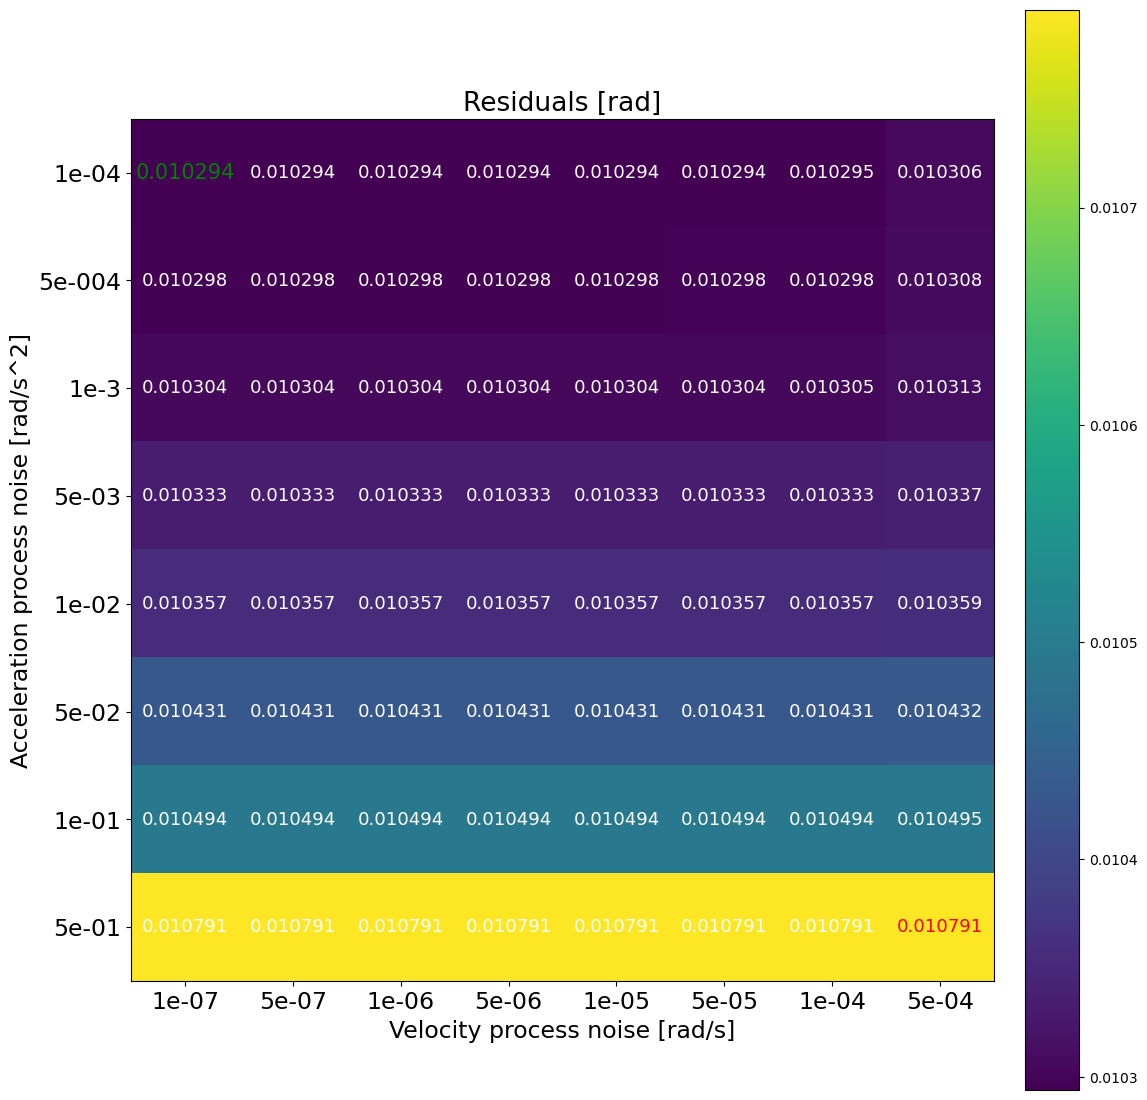

In [ ]:
import matplotlib.ticker as tick
x_labels = ["1e-07", "5e-07", "1e-06", "5e-06", "1e-05", "5e-05", "1e-04", "5e-04"]
y_labels = ['1e-04', '5e-004', '1e-3', '5e-03', '1e-02', '5e-02', '1e-01', '5e-01']
#table_path = f'{ekf_path}/tables'
fig, ax = plt.subplots(figsize = (12,12))
im = ax.imshow(means_matrix)
ax.set_xticks(np.arange(len(theta_dot_noises)), labels=theta_dot_noises, fontsize=12)
ax.set_yticks(np.arange(len(theta_ddot_noises)), labels=theta_ddot_noises, fontsize=12)
ax.set_xticks(np.arange(0,len(x_labels),1))
ax.set_xticklabels(x_labels, fontsize=17)
ax.set_yticks(np.arange(0,len(y_labels),1))
ax.set_yticklabels(y_labels, fontsize=17)

for i in range(len(theta_ddot_noises)):
    for j in range(len(theta_dot_noises)):
        if means_matrix[i, j]==np.min(means_matrix):
            color = 'green'
            fs = 15
        elif means_matrix[i, j]==np.max(means_matrix):
            color = 'red'
            fs = 13
        else:
            color = 'white'
            fs = 13
        text = ax.text(j, i, f'{round(np.array(means_matrix)[i, j],6) }' ,
                       ha="center", va="center", color=color, fontsize=fs)
ax.set_title(f"Residuals [rad]", fontsize=19)
ax.set_xlabel('Velocity process noise [rad/s]', fontsize=17)
ax.set_ylabel('Acceleration process noise [rad/s^2]', fontsize=17)

fig.tight_layout()
cbar = fig.colorbar(im, orientation='vertical', pad=0.03)

plt.show()

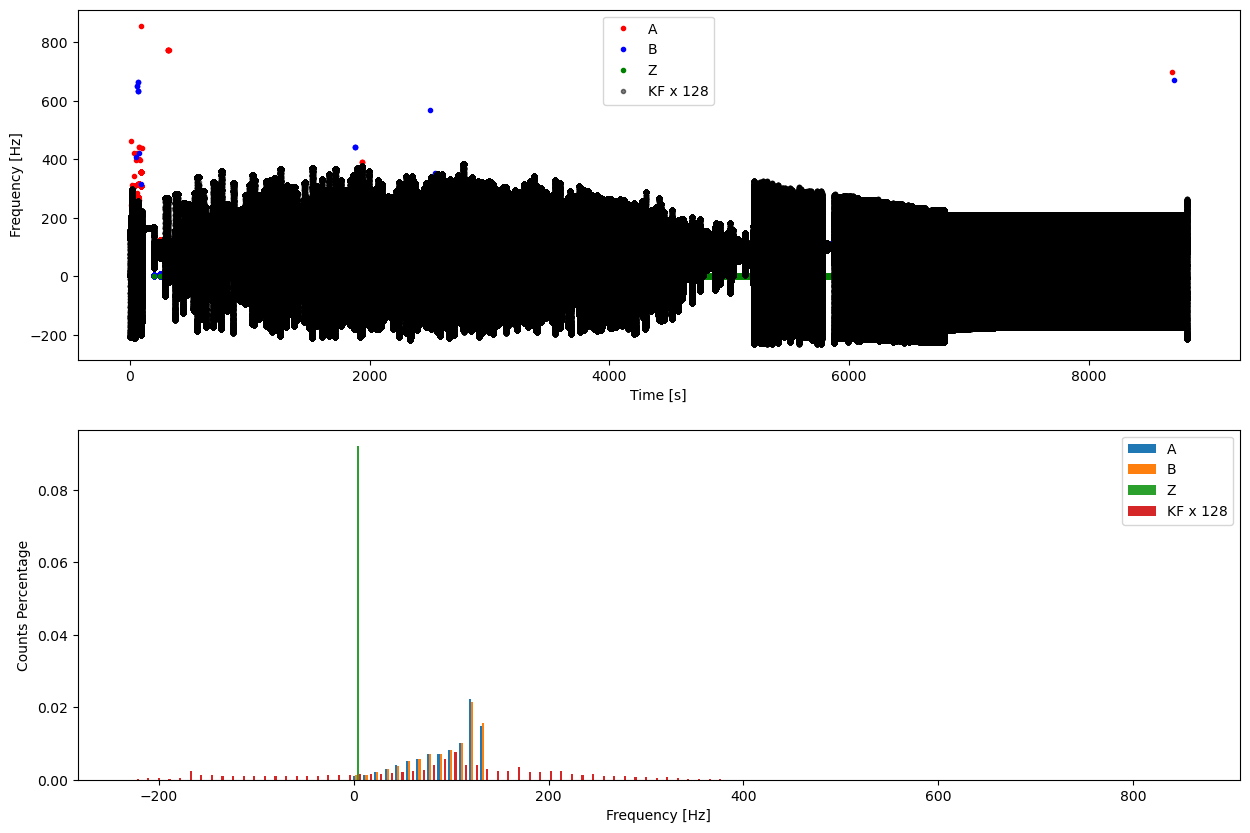

In [17]:
fig = plt.figure(figsize=[15,10])
plt.subplot(211)
plt.plot(tempi_a,freqs_a, 'r.', label = 'A')
plt.plot(tempi_b,freqs_b, 'b.', label = 'B')
plt.plot(tempi_z,freqs_z, 'g.', label = 'Z')
#plt.plot(tempi, np.array(theta_dot_vect)/(2*np.pi), 'k.', label = 'KF')
plt.plot(tempi, 128*np.array(theta_dot_vect)/(2*np.pi), 'k.', label = 'KF x 128', alpha = 0.5)
plt.xlabel('Time [s]')
plt.ylabel("Frequency [Hz]")
plt.legend()
plt.subplot(212)
plt.hist([freqs_a, freqs_b, freqs_z, 128*np.array(theta_dot_vect)/(2*np.pi)], bins = 100,density = True,label=['A', 'B', 'Z','KF x 128'])
#plt.hist(128*np.array(theta_dot_vect)/(2*np.pi), bins = 100,density = False,label='KF x 128')
plt.ylabel('Counts Percentage')
plt.xlabel("Frequency [Hz]")
plt.legend()
plt.show()

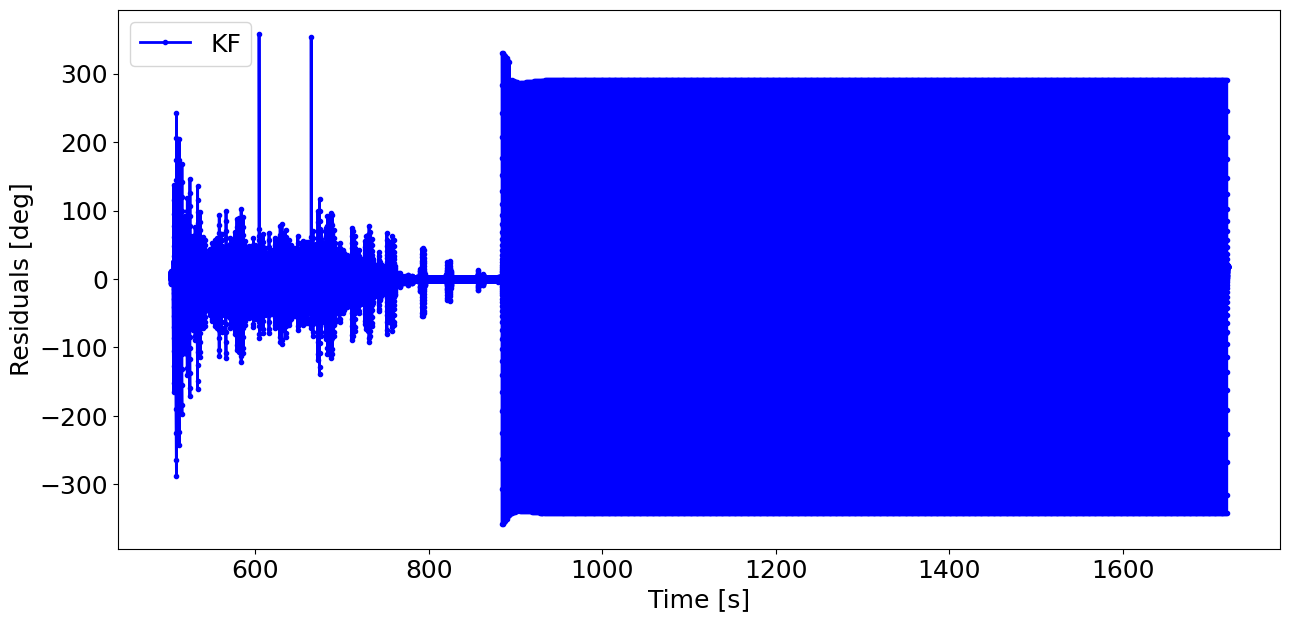

In [ ]:
for i in range(len(residuals_vect_abz)):
    if residuals_vect_abz[i]>5:
        residuals_vect_abz[i]=2*np.pi-residuals_vect_abz[i]
    if residuals_vect_abz[i]<-5:
        residuals_vect_abz[i]=-2*np.pi-residuals_vect_abz[i]
for i in range(len(res_to_plot_ekf)):
    if res_to_plot_ekf[i]>5:
        res_to_plot_ekf[i]=2*np.pi-res_to_plot_ekf[i]
    if res_to_plot_z[i]>5:
        res_to_plot_z[i]=2*np.pi-res_to_plot_z[i]
    if res_to_plot_ekf[i]<-5:
        res_to_plot_ekf[i]=-2*np.pi-res_to_plot_ekf[i]
    if res_to_plot_z[i]<-5:
        res_to_plot_z[i]=-2*np.pi-res_to_plot_z[i]
fig = plt.figure(figsize=[15,7])
fs = 18
plt.plot(measurements_time,np.array(residuals_vect)[:,0,0]*180/np.pi, 'b.-', label ='KF', linewidth = 2)
#plt.plot(measurements_time,np.array(residuals_vect_abz)*180/np.pi, 'r.-', label ='A-B-Z', linewidth = 2, alpha = 0.5)
#plt.plot(times_to_plot,np.array(res_to_plot_ekf)[:,0,0]*180/np.pi, 'b.-', label ='KF', linewidth = 1)
#plt.plot(times_to_plot,np.array(res_to_plot_z)*180/np.pi, 'r.-', label ='Z', linewidth = 1)
plt.xlabel('Time [s]',fontsize = fs)
plt.ylabel("Residuals [deg]",fontsize = fs)
plt.yticks(fontsize = fs)
plt.xticks(fontsize = fs)
plt.legend(fontsize = fs, loc = 'upper left')

plt.show()
#plt.plot(theta_dot_vect, 'k.')

In [ ]:
print(np.mean(freqs_a*2*np.pi/128), np.mean(freqs_b*2*np.pi/128), np.mean(freqs_z*2*np.pi),np.mean(theta_dot_vect))

6.311490475481653 6.311389425925475 3.8922881932591147 6.126627287597285


In [ ]:
resz = np.array(theta_vect)-np.array(thetas_z)
resa = np.array(theta_vect)-np.array(thetas_a)
resb = np.array(theta_vect)-np.array(thetas_b)


In [ ]:

for i in range(len(resz)):
    if resz[i] >5:
        resz[i]  = 2*np.pi-resz[i] 
for i in range(len(resa)):
    if resa[i] >5:
        resa[i]  = 2*np.pi-resa[i] 
for i in range(len(resb)):
    if resb[i] >5:
        resb[i]  = 2*np.pi-resb[i] 

In [ ]:
fig = plt.figure(figsize=(20,7))
#plt.subplot(511)
plt.plot(tempi, theta_vect, 'b,-', label = 'kf')

plt.legend()
plt.xlabel('Time [s]')
plt.ylabel('Position Angle [rad]')
plt.xlim([8000, 8100])
# plt.subplot(512)
# plt.plot(tempi, thetas_z, 'b,-', label = 'z')
# plt.plot(tempi, thetas_z, 'r,-', label = 'z')
# plt.plot(tempi, thetas_a, 'g,-', label = 'a')
# plt.plot(tempi, thetas_b, 'k,-', label = 'b')
# plt.legend()
# plt.xlabel('Time [s]')
# plt.ylabel('Position Angle [rad]')
# #plt.xlim([8370, 8400])
# plt.subplot(513)
# plt.plot(tempi, resz*180/np.pi, 'b,-', label = 'kf-z')
# plt.legend()
# plt.xlabel('Time [s]')
# plt.ylabel('Position Angle Residuals [deg]')
# #plt.xlim([8370, 8400])

# plt.subplot(514)
# plt.plot(tempi, resa*180/np.pi, 'b,-', label = 'kf-a')
# plt.legend()
# plt.xlabel('Time [s]')
# plt.ylabel('Position Angle Residuals [deg]')
p<#lt.ylim([0,7])

# plt.subplot(515)
# plt.plot(tempi, resb*180/np.pi, 'b,-', label = 'kf-b')
# plt.legend()
# plt.xlabel('Time [s]')
# plt.ylabel('Position Angle Residuals [deg]')
#plt.xlim([8370, 8400])
plt.show()

SyntaxError: invalid syntax (4131762269.py, line 30)

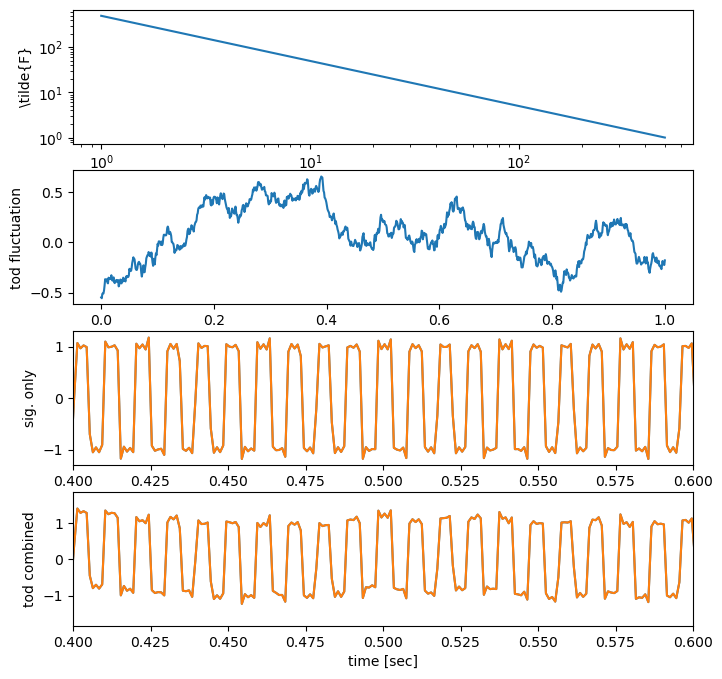

In [ ]:
import numpy as np
from scipy.fftpack import fft, ifft
import scipy.constants as sc
import pylab as py

'''
	main_1ofgen_v02.py
	
	2024-04-18, T. Matsumura
	This script is prepared for the Gilberto Goracci's KF filter analysis.

	Generate the simulated encoder signal with the white noise + the 1/f noise + spikes.
'''

def gen_1of(f_arr, A, f_knee, n):
	return A * (f_arr/f_knee)**n

def gen_1of_white(f_arr, A, f_knee, n):
	return A * (1.+(f_arr/f_knee)**n)

def gen_encsigA(t_arr, omega_0):
	encsigA = 4./pi*( 1./(1.)*np.sin(1.*omega_0*t_arr) \
		+ 1./(3.)*np.sin(3.*omega_0*t_arr) \
		+ 1./(5.)*np.sin(5.*omega_0*t_arr) \
		+ 1./(7.)*np.sin(7.*omega_0*t_arr) \
		+ 1./(9.)*np.sin(9.*omega_0*t_arr) \
		+ 1./(11.)*np.sin(11.*omega_0*t_arr) \
		+ 1./(13.)*np.sin(13.*omega_0*t_arr))
	return encsigA

pi = sc.pi
A = 5000.
f_knee = 0.1
n = -1.

omega_0 = 2.*pi*0.8*128.
phi_A = 0
phi_B = np.pi/2
f_max = 500.
num_f = 1000
delta_t = 0.001

time_total = num_f * delta_t
f_low = 1./time_total
f_high = 1./(2.*delta_t)
f_arr = np.linspace(f_low, f_high, num_f)
time_max = delta_t * num_f
time_arr = np.linspace(0,time_max,num_f)

f_fourier = gen_1of(f_arr, A, f_knee, n)
#f_fourier = gen_1of_white(f_arr, A, f_knee, n)

phase_rand_arr = np.random.uniform(0.,2.*pi,int(num_f))
f_fourier_complex = f_fourier*np.exp(1.j*phase_rand_arr)

f_fourier_complex_fftpack = np.hstack([np.real(f_fourier_complex), np.imag(f_fourier_complex[::-1])])
f_time = ifft(f_fourier_complex_fftpack)

num_fft = len(f_fourier_complex_fftpack)

tod_encsigA = gen_encsigA(time_arr, omega_0)
tod_encsigB = gen_encsigA(time_arr, omega_0)
tod_encsig_simdata_A = tod_encsigA + np.real(f_time[0:int(num_fft/2)]) 
tod_encsig_simdata_B = tod_encsigB + np.real(f_time[0:int(num_fft/2)]) 
py.figure(figsize=(8,8))
py.subplot(411)
py.plot(f_arr, f_fourier)
py.ylabel("\\tilde{F}")
py.xlabel("Frequency [Hz]")
py.loglog()

py.subplot(412)
py.plot(time_arr,np.real(f_time[0:int(num_fft/2)]))
py.ylabel("tod fluctuation")
#py.xlabel("time [sec]")

py.subplot(413)
py.plot(time_arr,tod_encsigA)
py.plot(time_arr,tod_encsigB)
py.ylabel("sig. only")
py.xlim([0.4,0.6])
#py.xlabel("time [sec]")

py.subplot(414)
py.plot(time_arr,tod_encsig_simdata_A)
py.plot(time_arr,tod_encsig_simdata_B)
py.ylabel("tod combined")
py.xlabel("time [sec]")
py.xlim([0.4,0.6])

py.show()